# Body Performance
https://www.kaggle.com/datasets/kukuroo3/body-performance-data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import feature_selection as fs
import numpy as np
from sklearn.decomposition import PCA
from sklearn import tree
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Preprocessing

<font size="4">After we download the data, we first 'vectorize' the gender by "get_dummies", so it can calculate by us in a numerical form. We also split out the "Target" and change it into a numerical form. At last we seperate the train and test data.

In [2]:
#kaggle(https://www.kaggle.com/datasets/kukuroo3/body-performance-data)

#read the data
data = pd.DataFrame(pd.read_csv('bodyPerformance.csv'))

#seperate the features and the class
#deal with none numerical data
#drop gender and class first
mid1 = data.drop(['gender','class'], axis=1)
#"victorize" the gender
mid2 = pd.get_dummies(data.gender)
test = pd.concat([mid2,mid1], axis=1)

#standardize
sc = StandardScaler()
test_std = sc.fit_transform(test)
data_std = pd.DataFrame(test_std, columns = test.columns)

#split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(data_std,data[['class']].replace(['A','B','C','D'],[1,2,3,4])\
                                                 ,test_size=0.3,random_state=100)

<font size="4">After finish preparing the data, we can show what it looks like and basic statistic characteristc of it.

In [3]:
data_std

,F,M,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,-0.762750,0.762750,-0.717432,0.443873,0.652150,-0.267367,0.112009,-0.015959,1.688190,0.377317,1.416961,0.674009
1,-0.762750,0.762750,-0.864220,-0.422465,-0.974734,-1.039081,-0.167278,-0.287820,-0.053073,0.128984,0.926634,0.975013
2,-0.762750,0.762750,-0.423857,1.310211,0.883127,-0.432734,1.229158,1.479276,0.737554,-0.379509,0.646446,-0.229005
3,-0.762750,0.762750,-0.350463,0.704961,0.305684,-0.667004,-0.260374,1.139450,0.417538,-0.001096,0.926634,0.724176
4,-0.762750,0.762750,-0.644038,0.621888,0.021147,-0.846152,-0.818948,-0.219855,0.615195,1.406129,0.366259,0.674009
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,-0.762750,0.762750,-0.864220,0.420138,0.364265,-0.970178,-0.446565,0.731658,-0.109547,0.259063,0.506353,0.197418
13389,-0.762750,0.762750,-1.157795,1.322079,-0.296866,-1.535183,-0.446565,-0.151890,-0.373090,-1.668480,0.576400,-0.580177
13390,-0.762750,0.762750,0.163293,1.025388,1.092346,-0.432734,-0.074183,0.119971,2.497643,0.140809,0.366259,0.975013
13391,1.311045,-1.311045,1.998138,-2.665451,-0.815728,2.364730,-1.005140,-0.627647,-1.662566,-0.710621,-2.785848,-2.887878


In [4]:
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


<font size="4">We can also take a look at how strong is the coorelation between each features by .corr().

<AxesSubplot:>

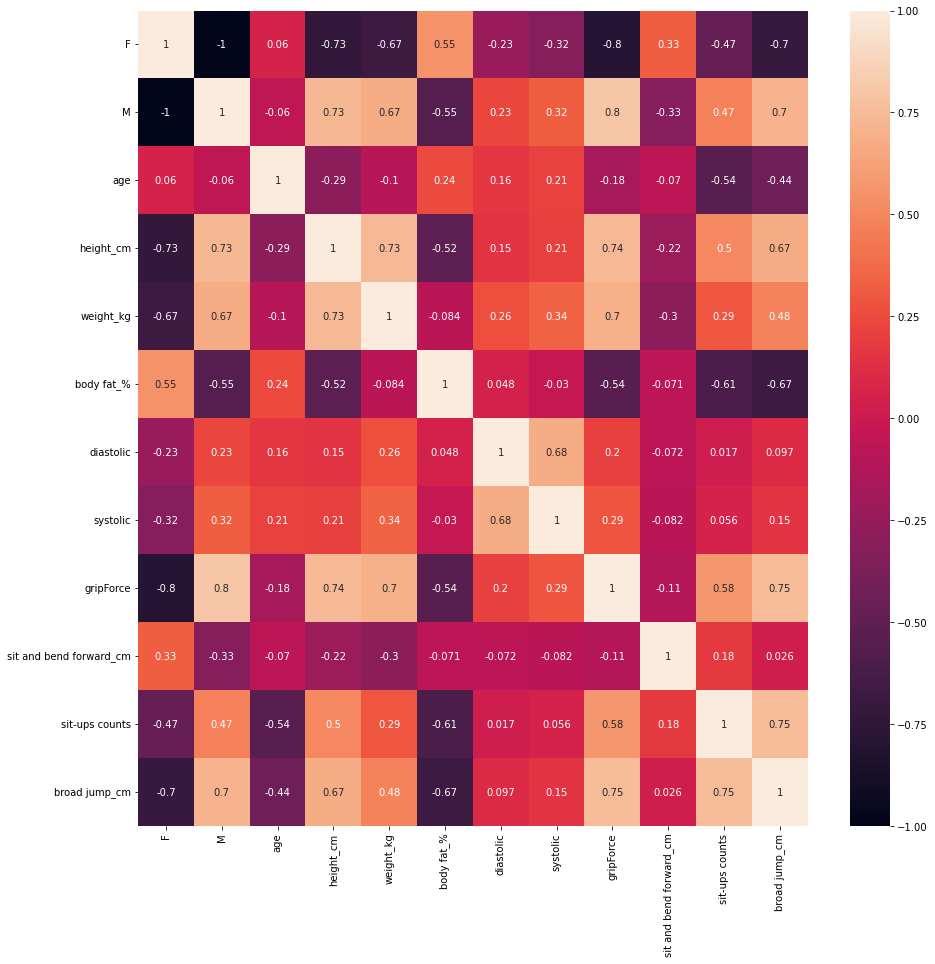

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(data_std.corr(),annot = True)

In [6]:
sns.set(rc={'figure.figsize':(14,6)}) #set the seaborn figure-size below

## Gender
<font size="4">Male are much more than Female, but the proportion of the class A is higher in Female.

<AxesSubplot:xlabel='gender', ylabel='count'>

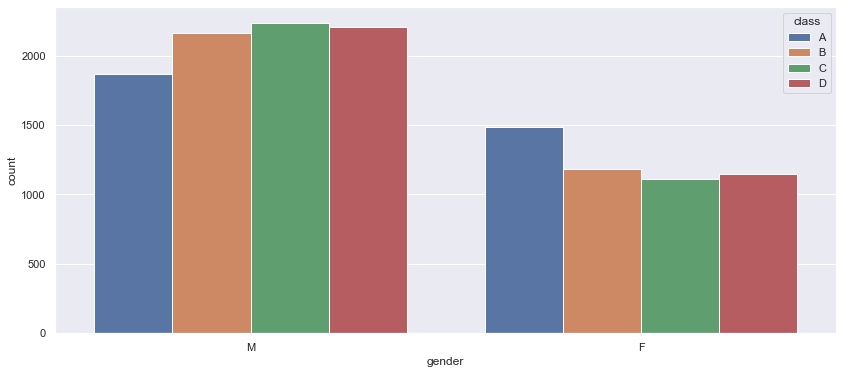

In [7]:
sns.countplot(data['gender'],hue=data['class'],hue_order=['A','B','C','D'])

## Age
<font size="4">Analyze the age distribution with class ang gender. One can see that young people are more than old people. The proportion of higher classes are slightly higher than elder, but not very obvious.

<AxesSubplot:xlabel='age', ylabel='count'>

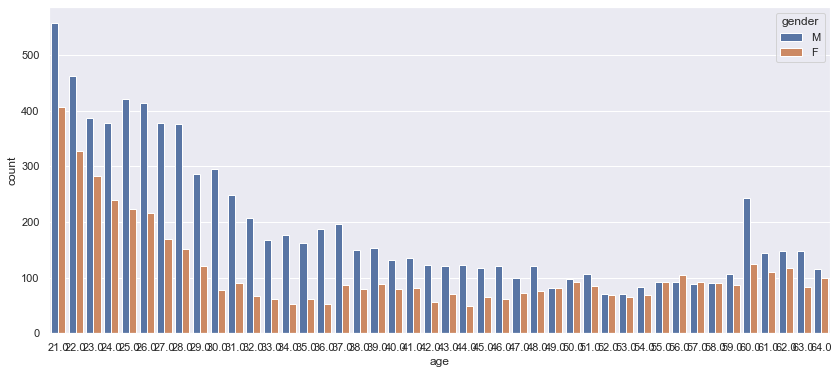

In [8]:
sns.countplot(data['age'],hue=data['gender'])

<AxesSubplot:xlabel='age_cut', ylabel='count'>

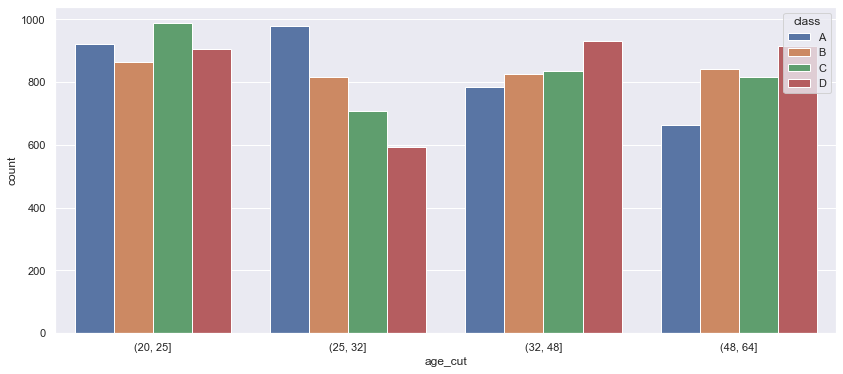

In [9]:
data['age_cut']=pd.cut(data['age'],[20,25,32,48,64]) #the cut is based on the quartile, min and max
sns.countplot(data['age_cut'],hue=data['class'],hue_order=['A','B','C','D'])

## height
<font size="4">The dependence on height and class is not obvious, but male are much taller than female in general.

<AxesSubplot:xlabel='height_cut', ylabel='count'>

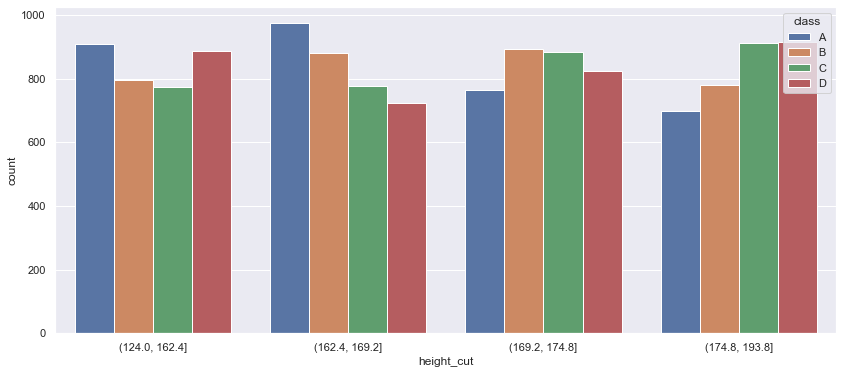

In [10]:
data['height_cut']=pd.cut(data['height_cm'],[124,162.4,169.2,174.8,193.8]) #the cut is based on the quartile, min and max
sns.countplot(data['height_cut'],hue=data['class'],hue_order=['A','B','C','D'])

<AxesSubplot:xlabel='gender', ylabel='count'>

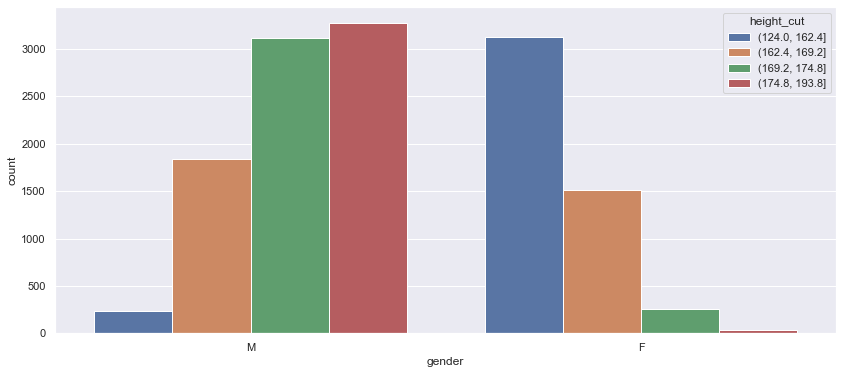

In [11]:
sns.countplot(data['gender'],hue=data['height_cut'])

# Original Features
<font size="4">First put the original features into the model.

## LogisticRegression
<font size="4">The score of training set and testing set are very close for logistic regression.

In [12]:
lr = LogisticRegression(solver='lbfgs',multi_class='auto')
lr.fit(x_train,y_train)
print('train:',lr.score(x_train,y_train))
print('test:',lr.score(x_test,y_test))

train: 0.6269866666666667
test: 0.6030363364858138


## KNN
<font size="4">After ten points, the score will increase a lot. As for weight, 'distance' can cause overfitting, so 'uniform' will perform better here. For distance, 'p=1(manhattan_distance)' will perform better than 'p=2(minkowski_distance)' in general.

p=1,weights=uniform: 
for 1 points:  train: 1.0  test: 0.5485316077650573
for 11 points:  train: 0.696  test: 0.6219512195121951
for 21 points:  train: 0.6869333333333333  test: 0.6348929815828771
for 31 points:  train: 0.6753066666666667  test: 0.6371329019412643
for 41 points:  train: 0.67008  test: 0.6321553011448482


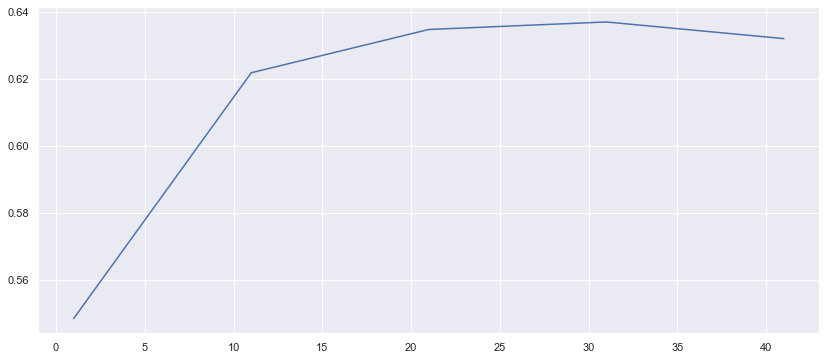

p=1,weights=distance: 
for 1 points:  train: 1.0  test: 0.5485316077650573
for 11 points:  train: 1.0  test: 0.627177700348432
for 21 points:  train: 1.0  test: 0.6386261821801892
for 31 points:  train: 1.0  test: 0.6426082628173221
for 41 points:  train: 1.0  test: 0.6403683424589348


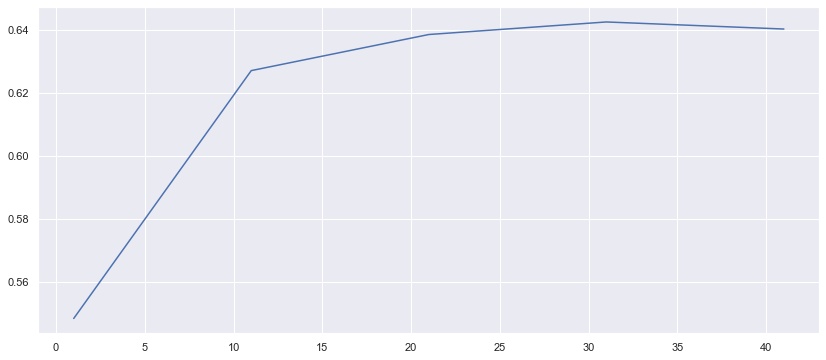

p=2,weights=uniform: 
for 1 points:  train: 1.0  test: 0.5542558486809358
for 11 points:  train: 0.6881066666666666  test: 0.6110004977600796
for 21 points:  train: 0.6688  test: 0.6124937779990045
for 31 points:  train: 0.6599466666666667  test: 0.6177202588352414
for 41 points:  train: 0.6519466666666667  test: 0.6152314584370333


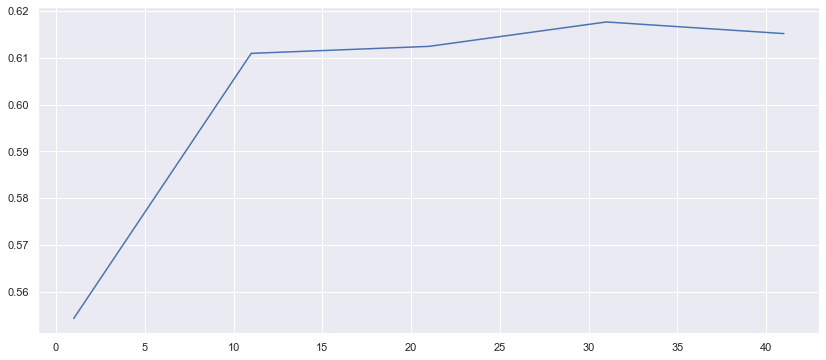

p=2,weights=distance: 
for 1 points:  train: 1.0  test: 0.5542558486809358
for 11 points:  train: 1.0  test: 0.618218018914883
for 21 points:  train: 1.0  test: 0.6204579392732703
for 31 points:  train: 1.0  test: 0.6281732205077153
for 41 points:  train: 1.0  test: 0.6204579392732703


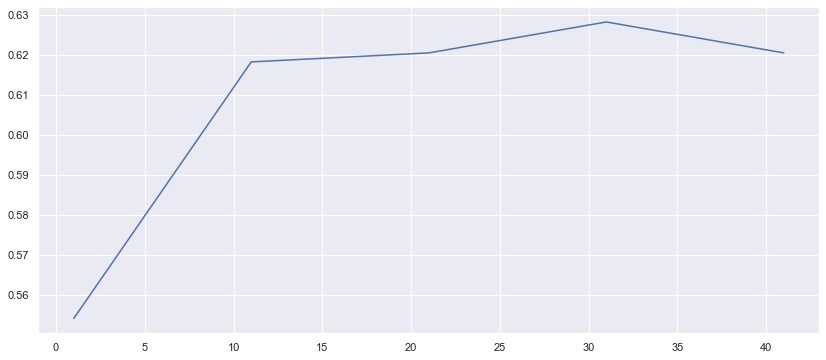

In [54]:
for i in [1,2]:
    for x in ['uniform','distance']:
        print(f"p={i},weights={x}: ")
        Score_clf = []
        for m in range(1,51,10):
            clf = KNeighborsClassifier(n_neighbors=m,p=i,weights=x,algorithm='brute')
            clf.fit(x_train,y_train)
            print('for {} points:'.format(m),end='  ')
            print('train:',clf.score(x_train,y_train), end='  ')
            print('test:',clf.score(x_test,y_test))
            Score_clf.append(clf.score(x_test,y_test))
        plt.plot(range(1,51,10),Score_clf)
        plt.show()

## DecisionTree
<font size="4">For defferent depth,10-depths will perform the best, and also 'gini' is slightly better than 'entropy'. There are some over-fitting problems as the max_depth becomes larger.

criterion=entropy:
for 1 max_dapth:  train: 0.41408  test: 0.4051767048282728
for 2 max_dapth:  train: 0.47669333333333336  test: 0.46366351418616225
for 3 max_dapth:  train: 0.5674666666666667  test: 0.547536087605774
for 4 max_dapth:  train: 0.57312  test: 0.5487804878048781
for 5 max_dapth:  train: 0.5995733333333333  test: 0.5726729716276755
for 6 max_dapth:  train: 0.6314666666666666  test: 0.6085116973618716
for 7 max_dapth:  train: 0.6743466666666666  test: 0.6234444997511199
for 8 max_dapth:  train: 0.70912  test: 0.6453459432553509
for 9 max_dapth:  train: 0.74848  test: 0.6560477849676456
for 10 max_dapth:  train: 0.7844266666666667  test: 0.6570433051269288
for 11 max_dapth:  train: 0.82272  test: 0.6508213041314087
for 12 max_dapth:  train: 0.8622933333333334  test: 0.6493280238924838
for 13 max_dapth:  train: 0.9009066666666666  test: 0.6557989049278248
for 14 max_dapth:  train: 0.9320533333333333  test: 0.63887506222001
for 15 max_dapth:  train: 0.9563733333333333  test: 

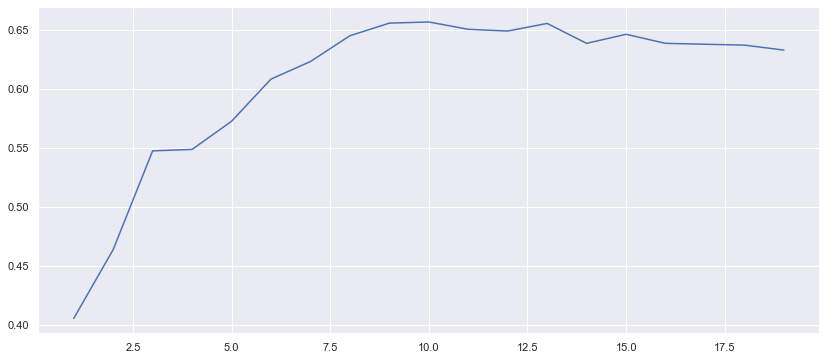

criterion=gini:
for 1 max_dapth:  train: 0.39253333333333335  test: 0.3845196615231458
for 2 max_dapth:  train: 0.47285333333333335  test: 0.4604280736684918
for 3 max_dapth:  train: 0.54944  test: 0.5365853658536586
for 4 max_dapth:  train: 0.5688533333333333  test: 0.5545047287207566
for 5 max_dapth:  train: 0.6120533333333333  test: 0.6057740169238427
for 6 max_dapth:  train: 0.6229333333333333  test: 0.5943255350920856
for 7 max_dapth:  train: 0.66272  test: 0.6299153807864609
for 8 max_dapth:  train: 0.7028266666666667  test: 0.6488302638128423
for 9 max_dapth:  train: 0.7384533333333333  test: 0.6582877053260329
for 10 max_dapth:  train: 0.7797333333333333  test: 0.6702339472374316
for 11 max_dapth:  train: 0.81984  test: 0.6692384270781483
for 12 max_dapth:  train: 0.8603733333333333  test: 0.6679940268790443
for 13 max_dapth:  train: 0.8962133333333333  test: 0.6642608262817322
for 14 max_dapth:  train: 0.9240533333333333  test: 0.6595321055251369
for 15 max_dapth:  train: 0.95

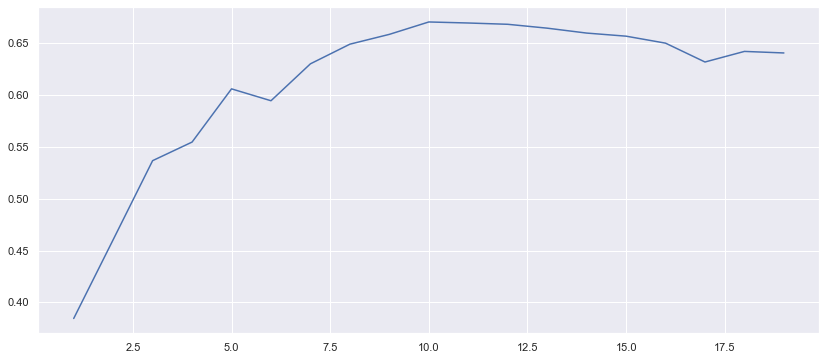

In [14]:
for i in ['entropy','gini']:
    print(f"criterion={i}:")
    Score_clt = []
    for m in range(1,20):
        clt = DecisionTreeClassifier(criterion=i,max_depth=m)
        clt.fit(x_train,y_train)
        print('for {} max_dapth:'.format(m),end='  ')
        print('train:',clt.score(x_train,y_train),end='  ')
        print('test:',clt.score(x_test,y_test))
        Score_clt.append(clt.score(x_test,y_test))
    plt.plot(range(1,20),Score_clt)
    plt.show()

## RandomForest
<font size="4">Random Forest performs the best. For different numbers of tree, as the numbers increase, the performance will flattern out. But there are also over-fitting issues as the number increase.

criterion=gini:
for 1 trees:  train: 0.83584  test: 0.5368342458934794
for 101 trees:  train: 1.0  test: 0.7244897959183674
for 201 trees:  train: 1.0  test: 0.7332005973120955
for 301 trees:  train: 1.0  test: 0.7356893977103036
for 401 trees:  train: 1.0  test: 0.7356893977103036
for 501 trees:  train: 1.0  test: 0.735191637630662


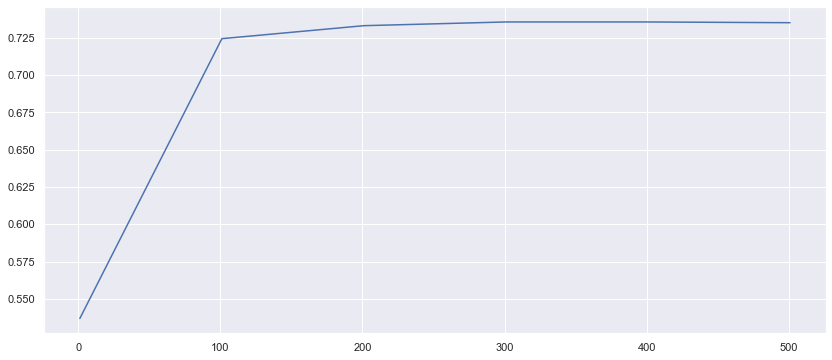

criterion=entropy:
for 1 trees:  train: 0.8411733333333333  test: 0.5512692882030861
for 101 trees:  train: 1.0  test: 0.7289696366351419
for 201 trees:  train: 1.0  test: 0.7322050771528124
for 301 trees:  train: 1.0  test: 0.7359382777501244
for 401 trees:  train: 1.0  test: 0.732702837232454
for 501 trees:  train: 1.0  test: 0.735191637630662


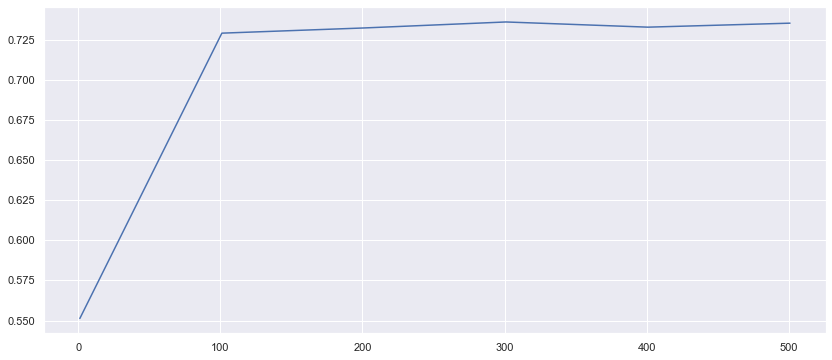

In [55]:
for i in ['gini','entropy']:
    print(f"criterion={i}:")
    Score_clr = []
    for m in range(1,502,100):    
        clr = RandomForestClassifier(criterion=i, n_estimators=m, random_state=100, n_jobs=8)
        clr.fit(x_train,y_train)
        print(f'for {m} trees:',end='  ')
        print('train:',clr.score(x_train,y_train),end='  ')
        print('test:',clr.score(x_test,y_test))
        Score_clr.append(clr.score(x_test,y_test))
    plt.plot(range(1,502,100),Score_clr)
    plt.show()

# Feature Selection
<font size="4">Next we focus on the features, we use 'SelectKBest()' to choose which feature is the most importment for the classification.

In [25]:
fss = fs.SelectKBest(fs.mutual_info_classif,k=12)
x_train_s1 = fss.fit(x_train,y_train)
x_train_s = x_train_s1.transform(x_train)
x_test_s = fss.transform(x_test)
x_train_s = pd.DataFrame(x_train_s, columns=x_train.columns[fss.get_support()])
x_test_s = pd.DataFrame(x_test_s, columns=x_train.columns[fss.get_support()])
print(fss.scores_)
x_train

[0.00339091 0.00575459 0.01487112 0.00992477 0.03392006 0.0867532
 0.01151655 0.0023011  0.04177277 0.30311295 0.13121463 0.0618232 ]


,F,M,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
1614,-0.762750,0.762750,-0.644038,0.230255,0.247103,-0.846152,0.391296,0.935554,0.229294,0.471921,0.856587,0.824511
6498,1.311045,-1.311045,-0.937613,0.313329,-0.932891,-1.094203,-1.470618,-1.511195,-0.222494,1.760891,0.786540,0.648925
5728,-0.762750,0.762750,1.484382,0.123446,0.397740,-0.184683,1.415349,1.343345,0.794028,0.471921,0.926634,0.623841
7342,1.311045,-1.311045,-0.864220,-0.481804,0.088096,2.130459,-0.260374,-0.491716,-0.373090,0.720254,0.786540,-0.580177
11632,-0.762750,0.762750,0.677050,0.954182,0.079728,-0.694565,-0.074183,0.663693,0.605783,0.247238,-0.124069,0.373004
...,...,...,...,...,...,...,...,...,...,...,...,...
79,1.311045,-1.311045,1.704563,-1.181995,-0.397291,1.565454,0.112009,0.459797,-0.721342,0.377317,-1.945286,-1.458107
12119,1.311045,-1.311045,-0.570645,-0.054568,-0.966366,-0.005535,1.229158,0.255902,-0.749579,0.448270,0.506353,-0.780847
8039,-0.762750,0.762750,0.603656,-0.102039,-0.079278,-0.611882,-1.191331,-0.083925,0.577546,-0.521414,-0.334209,-0.279172
6936,-0.762750,0.762750,-0.790826,0.182785,-0.405660,-1.480060,-0.539661,-0.287820,1.161105,0.318190,1.136774,1.175683


<font size="4">We can see by the 'scores_' that the most importment features are 'sit and bend forward_cm','sit-ups counts' and 'body fat_%', and the least importment features are 'gender', 'systolic', 'height' and 'diastolic'.

In [26]:
for i,o in enumerate(fss.scores_):
    print(f"'{list(x_train.columns)[i]}' has score: {o}")

'F' has score: 0.0033909066088204654
'M' has score: 0.005754590787137914
'age' has score: 0.01487112428327686
'height_cm' has score: 0.009924767800550516
'weight_kg' has score: 0.0339200622149507
'body fat_%' has score: 0.08675320406015352
'diastolic' has score: 0.011516547283786593
'systolic' has score: 0.0023010954471529566
'gripForce' has score: 0.04177277494328413
'sit and bend forward_cm' has score: 0.30311294851729675
'sit-ups counts' has score: 0.1312146293335532
'broad jump_cm' has score: 0.06182320488396975


<font size="4">Before put them back into the model, we can first show these features' relationship with the class. One can see that neglet of the extreme value, the trend between them and class are relatively obvious.

<AxesSubplot:xlabel='class', ylabel='sit and bend forward_cm'>

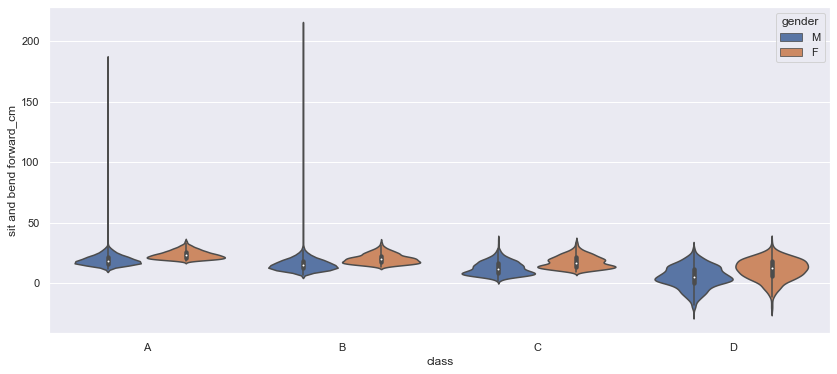

In [27]:
sns.violinplot(data['class'],data['sit and bend forward_cm'],hue=data['gender'],order=['A','B','C','D'])

<AxesSubplot:xlabel='class', ylabel='sit-ups counts'>

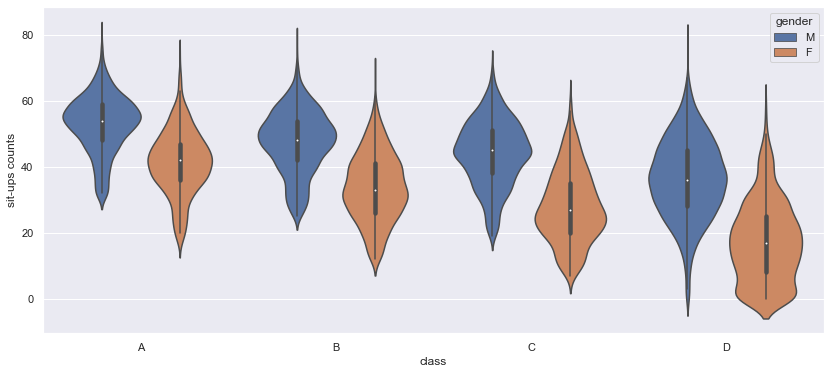

In [28]:
sns.violinplot(data['class'],data['sit-ups counts'],hue=data['gender'],order=['A','B','C','D'])

<AxesSubplot:xlabel='class', ylabel='body fat_%'>

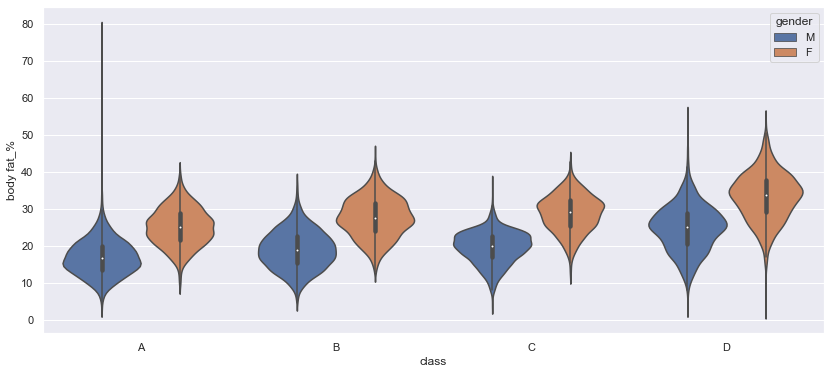

In [29]:
sns.violinplot(data['class'],data['body fat_%'],hue=data['gender'],order=['A','B','C','D'])

<font size="4">As for the most unimportment features, we can show that the trend between them and class are very hard to see.

<AxesSubplot:xlabel='class', ylabel='diastolic'>

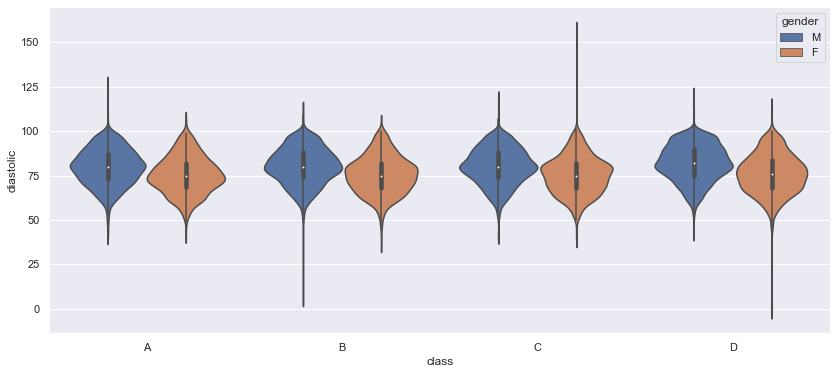

In [30]:
sns.violinplot(data['class'],data['diastolic'],hue=data['gender'],order=['A','B','C','D'])

<AxesSubplot:xlabel='class', ylabel='height_cm'>

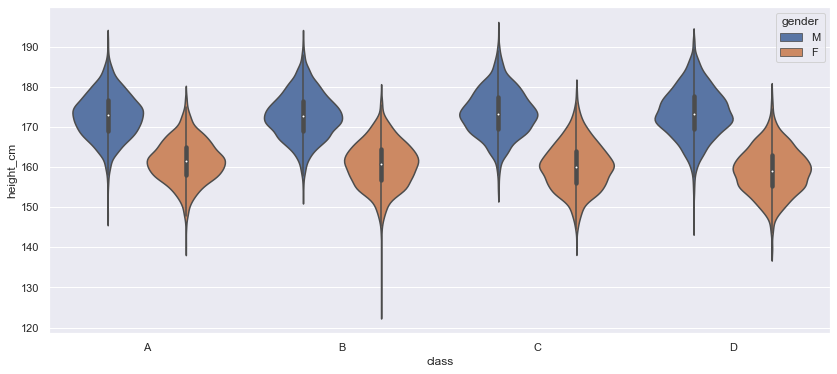

In [53]:
sns.violinplot(data['class'],data['height_cm'],hue=data['gender'],order=['A','B','C','D'])

<AxesSubplot:xlabel='class', ylabel='systolic'>

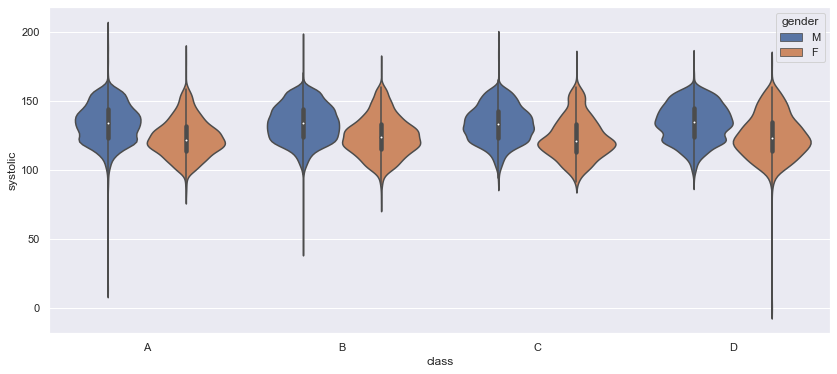

In [31]:
sns.violinplot(data['class'],data['systolic'],hue=data['gender'],order=['A','B','C','D'])

<font size="4">We can also see by the heatmap above to look for the relationship between these features.

In [32]:
clist = data['class'].replace(['A','B','C','D'],[1,2,3,4]).tolist()
#we first let our class to be numerical data A->1, B->2, C->3, D->4

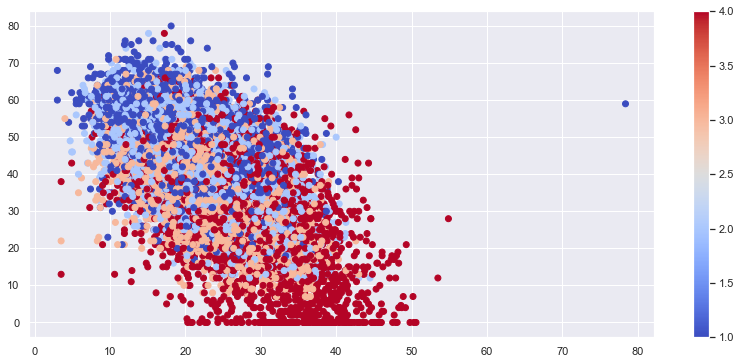

In [33]:
plt.scatter(data['body fat_%'],data['sit-ups counts'],c=clist,cmap='coolwarm')
plt.colorbar()

(0.0, 60.0)

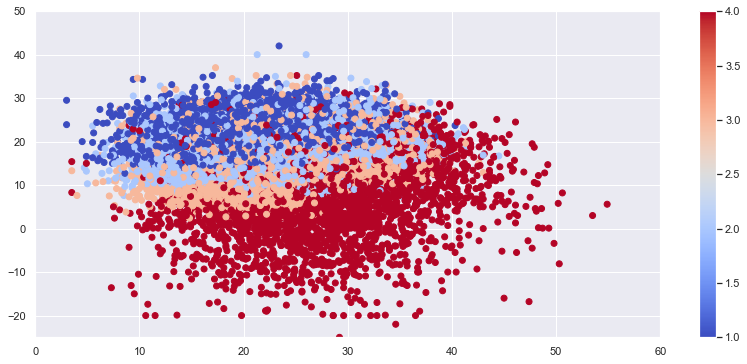

In [35]:
plt.scatter(data['body fat_%'],data['sit and bend forward_cm'],c=clist,cmap='coolwarm')
plt.colorbar()
plt.ylim(-25,50)
plt.xlim(0,60)

(-25.0, 50.0)

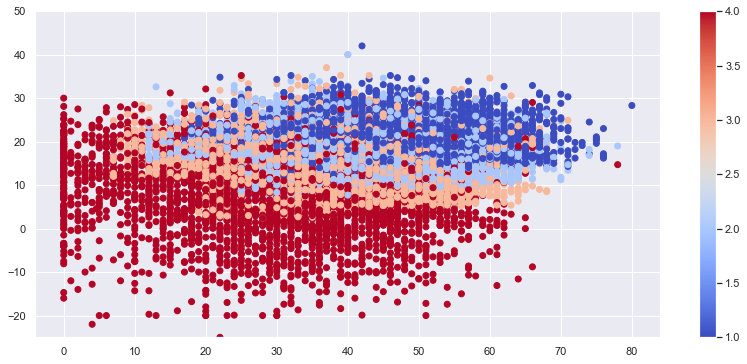

In [36]:
plt.scatter(data['sit-ups counts'],data['sit and bend forward_cm'],c=clist,cmap='coolwarm')
plt.colorbar()
plt.ylim(-25,50)

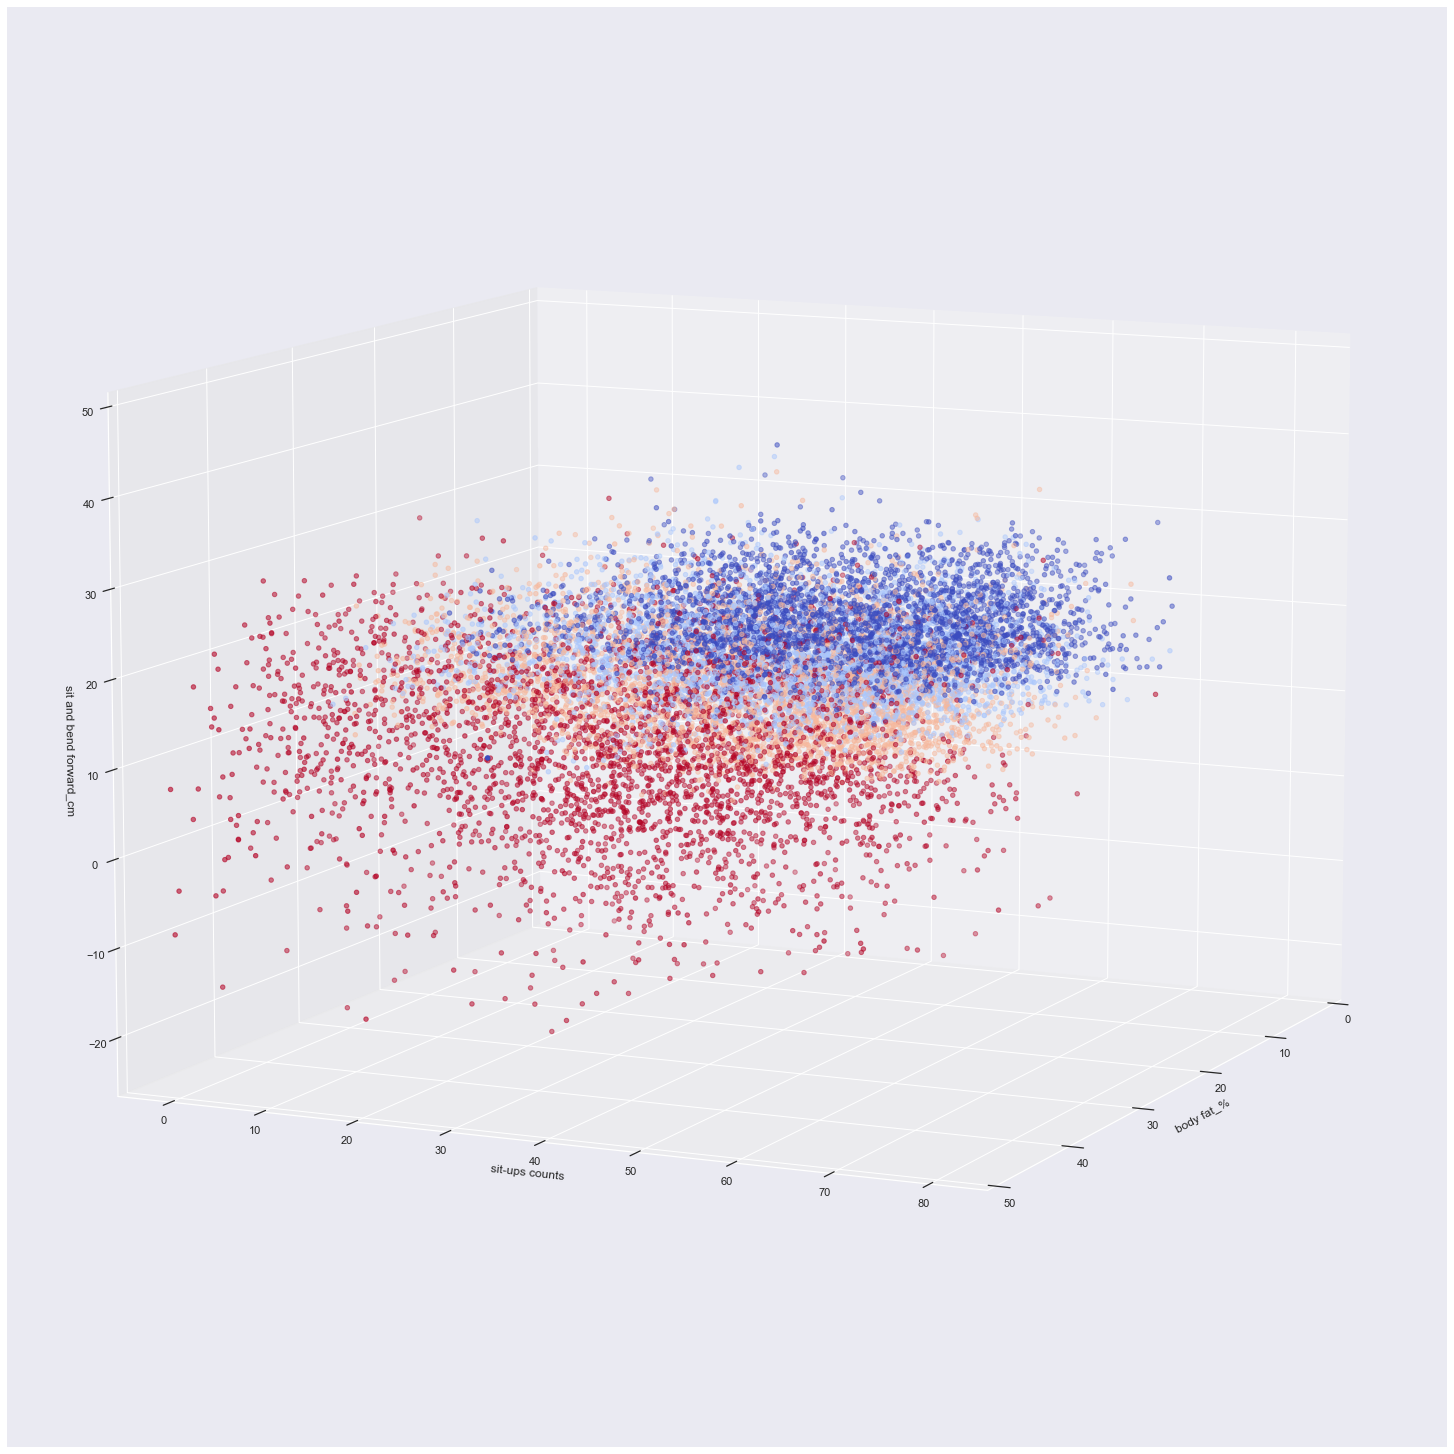

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,20))
ax = Axes3D(fig)
ax.set_xlabel('body fat_%')
ax.set_ylabel('sit-ups counts')
ax.set_zlabel('sit and bend forward_cm')

ax.set_xlim(0,50)
ax.set_zlim(-25,50)
ax.view_init(10,25)
ax.scatter(data['body fat_%'],data['sit-ups counts'],data['sit and bend forward_cm'],c=clist,cmap='coolwarm')


## LogisticRegression-Feature Selection change
<font size="4">For 'LogisticRegression', the performance after 10 features are about the same, and it doesn't change a lot with consider all features.

for select 1 features:
train: 0.45482666666666666
test: 0.47112991538078647
Index(['sit and bend forward_cm'], dtype='object') 

for select 2 features:
train: 0.5383466666666666
test: 0.5313588850174216
Index(['sit and bend forward_cm', 'sit-ups counts'], dtype='object') 

for select 3 features:
train: 0.5483733333333334
test: 0.5423096067695371
Index(['body fat_%', 'sit and bend forward_cm', 'sit-ups counts'], dtype='object') 

for select 4 features:
train: 0.5530666666666667
test: 0.5460428073668492
Index(['body fat_%', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object') 

for select 5 features:
train: 0.55072
test: 0.5423096067695371
Index(['body fat_%', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object') 

for select 6 features:
train: 0.57152
test: 0.5684420109507218
Index(['weight_kg', 'body fat_%', 'gripForce', 'sit and bend forward_cm',
       'sit-ups counts', 'broad jump_cm'],
      d

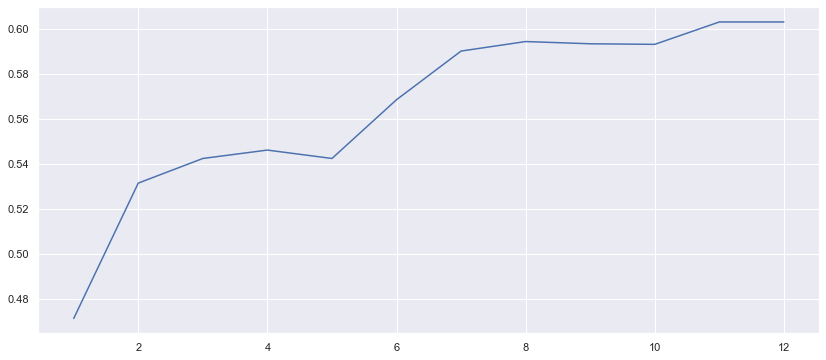

In [39]:
Score_lr_sc_total = []
for i in range(1,13,1):
    fssc = fs.SelectKBest(fs.mutual_info_classif,k=i)
    x_train_sc = fssc.fit_transform(x_train,y_train)
    x_test_sc = fssc.transform(x_test)
    x_train_sc = pd.DataFrame(x_train_sc, columns=x_train.columns[fssc.get_support()])
    x_test_sc = pd.DataFrame(x_test_sc, columns=x_train.columns[fssc.get_support()])
    lr_sc = LogisticRegression(solver='lbfgs',multi_class='auto')
    lr_sc.fit(x_train_sc,y_train)
    print('for select {} features:'.format(i))
    print('train:',lr_sc.score(x_train_sc,y_train))
    print('test:',lr_sc.score(x_test_sc,y_test))
    print(x_train_sc.columns,'\n')
    Score_lr_sc_total.append(lr_sc.score(x_test_sc,y_test))
    
plt.plot(range(1,13,1),Score_lr_sc_total)
plt.show()

## KNN-Feature Selection change
<font size="4">For 'Feature Selection', the feature selection effect really reflect, and the best number of neighbor points also change.

In [40]:
Score_clf_sc_total = []
for i in range(1,13,1):
    fssc = fs.SelectKBest(fs.mutual_info_classif,k=i)
    x_train_sc = fssc.fit_transform(x_train,y_train)
    x_test_sc = fssc.transform(x_test)
    print('for select {} features:'.format(i))
    Score_clf_sc = []
    for m in range(10,51,10):
        clf_sc = KNeighborsClassifier(n_neighbors=m,p=1,weights='uniform',algorithm='brute')
        clf_sc.fit(x_train_sc,y_train)
        print('for {} points:'.format(m),end='  ')
        print('train:',clf_sc.score(x_train_sc,y_train),end='  ')
        print('test',clf_sc.score(x_test_sc,y_test))
        Score_clf_sc.append(clf_sc.score(x_test_sc,y_test))
    Score_clf_sc_total.append(Score_clf_sc)

for select 1 features:
for 10 points:  train: 0.47701333333333334  test 0.4611747137879542
for 20 points:  train: 0.4939733333333333  test 0.4793429566948731
for 30 points:  train: 0.4997333333333333  test 0.476854156296665
for 40 points:  train: 0.50144  test 0.47834743653558986
for 50 points:  train: 0.5012266666666667  test 0.4753608760577402
for select 2 features:
for 10 points:  train: 0.6292266666666667  test 0.5440517670482827
for 20 points:  train: 0.6018133333333333  test 0.5520159283225485
for 30 points:  train: 0.59872  test 0.5637132901941264
for 40 points:  train: 0.58848  test 0.5771528123444499
for 50 points:  train: 0.58976  test 0.5778994524639124
for select 3 features:
for 10 points:  train: 0.64896  test 0.5711796913887506
for 20 points:  train: 0.6261333333333333  test 0.5866102538576407
for 30 points:  train: 0.6146133333333333  test 0.5871080139372822
for 40 points:  train: 0.60736  test 0.5935788949726232
for 50 points:  train: 0.60384  test 0.5923344947735192
fo

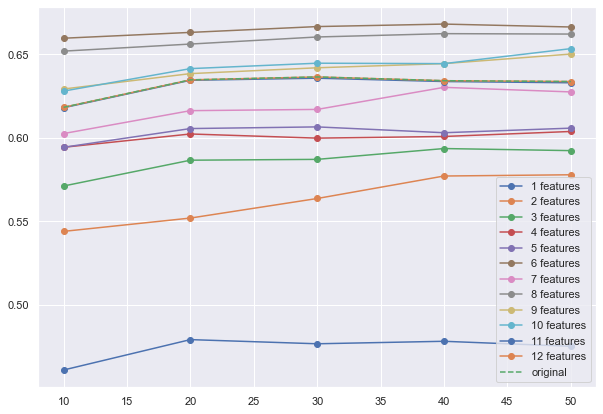

In [41]:
Score_clf = []
for m in range(10,51,10):#觀察鄰近點數量對模型影響
    clf = KNeighborsClassifier(n_neighbors=m,p=1,weights='uniform',algorithm='brute')
    clf.fit(x_train,y_train)
    Score_clf.append(clf.score(x_test,y_test))

plt.figure(figsize=(10,7))
for i in range(len(Score_clf_sc_total)):
    plt.plot(range(10,51,10),Score_clf_sc_total[i],"o-",label='{} features'.format(i+1))
plt.plot(range(10,51,10),Score_clf,"--",label='original')
plt.legend(loc='best')
plt.show()

## Decision Tree-Feature Selection change
<font size="4">For 'Decision Tree', it also slightly increase as the features' numbers change, and the best depth number will also change with it.

In [42]:
Score_clt_sc_total = []
for i in range(1,13,1):
    fssc = fs.SelectKBest(fs.mutual_info_classif,k=i)
    x_train_sc = fssc.fit_transform(x_train,y_train)
    x_test_sc = fssc.transform(x_test)
    print('for select {} features:'.format(i))
    Score_clt_sc = []
    for m in range(1,20):
        clt_sc = DecisionTreeClassifier(criterion='gini',max_depth=m)
        clt_sc.fit(x_train_sc,y_train)
        print('for {} max_dapth:'.format(m),end='  ')
        print('train:',clt_sc.score(x_train_sc,y_train),end='  ')
        print('test',clt_sc.score(x_test_sc,y_test))
        Score_clt_sc.append(clt_sc.score(x_test_sc,y_test))
    Score_clt_sc_total.append(Score_clt_sc)

for select 1 features:
for 1 max_dapth:  train: 0.39253333333333335  test 0.3845196615231458
for 2 max_dapth:  train: 0.47285333333333335  test 0.4604280736684918
for 3 max_dapth:  train: 0.4843733333333333  test 0.4917869586859134
for 4 max_dapth:  train: 0.49205333333333334  test 0.49153807864609256
for 5 max_dapth:  train: 0.49418666666666666  test 0.491040318566451
for 6 max_dapth:  train: 0.49717333333333336  test 0.4912891986062718
for 7 max_dapth:  train: 0.4994133333333333  test 0.4873071179691389
for 8 max_dapth:  train: 0.50304  test 0.47909407665505227
for 9 max_dapth:  train: 0.5045333333333333  test 0.4798407167745147
for 10 max_dapth:  train: 0.50656  test 0.4763563962170234
for 11 max_dapth:  train: 0.5080533333333334  test 0.4753608760577402
for 12 max_dapth:  train: 0.5082666666666666  test 0.4738675958188153
for 13 max_dapth:  train: 0.50848  test 0.4736187157789945
for 14 max_dapth:  train: 0.5086933333333333  test 0.4736187157789945
for 15 max_dapth:  train: 0.5088 

for 11 max_dapth:  train: 0.7515733333333333  test 0.5985564957690394
for 12 max_dapth:  train: 0.7924266666666666  test 0.5913389746142359
for 13 max_dapth:  train: 0.8305066666666666  test 0.5930811348929815
for 14 max_dapth:  train: 0.8679466666666666  test 0.5811348929815828
for 15 max_dapth:  train: 0.9026133333333334  test 0.569437531110005
for 16 max_dapth:  train: 0.93088  test 0.5689397710303634
for 17 max_dapth:  train: 0.9502933333333333  test 0.5569935291189647
for 18 max_dapth:  train: 0.9634133333333333  test 0.5579890492782479
for 19 max_dapth:  train: 0.97472  test 0.5567446490791439
for select 8 features:
for 1 max_dapth:  train: 0.39253333333333335  test 0.3845196615231458
for 2 max_dapth:  train: 0.47285333333333335  test 0.4604280736684918
for 3 max_dapth:  train: 0.54944  test 0.5365853658536586
for 4 max_dapth:  train: 0.5688533333333333  test 0.5545047287207566
for 5 max_dapth:  train: 0.6120533333333333  test 0.6057740169238427
for 6 max_dapth:  train: 0.6228266

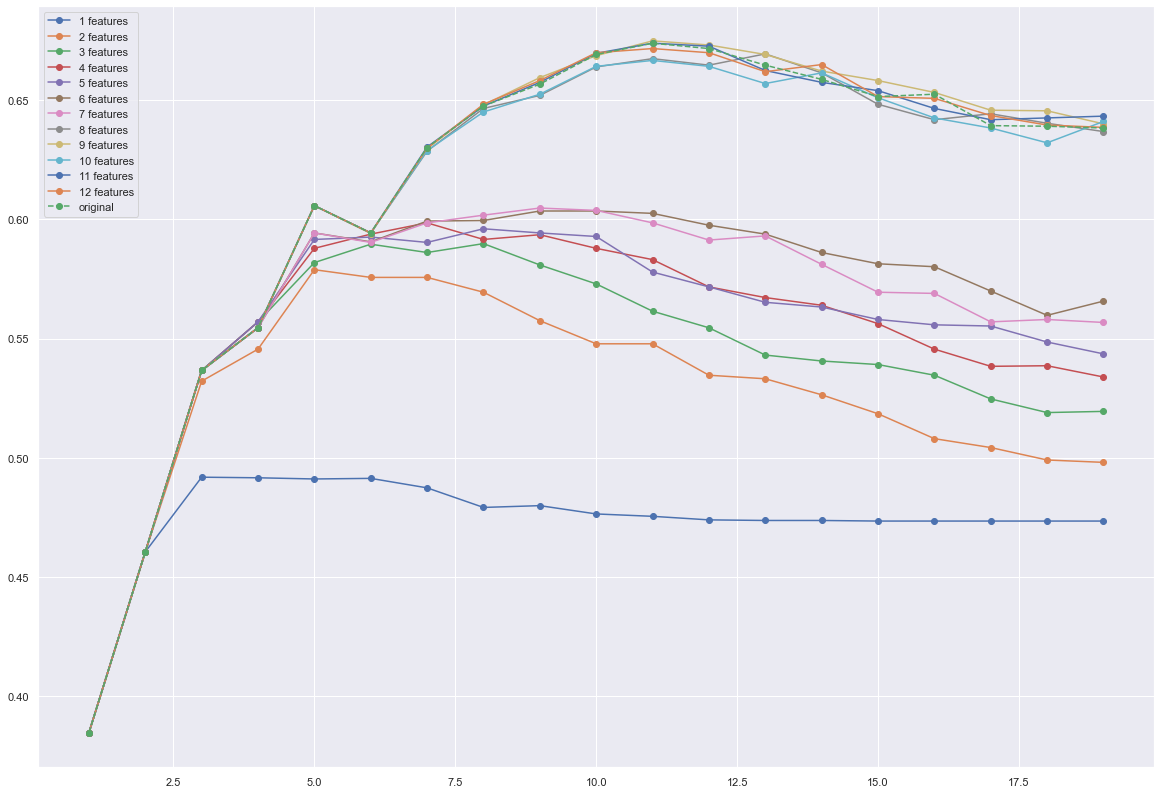

In [43]:
Score_clt = []
for m in range(1,20):
    clt = DecisionTreeClassifier(criterion='gini',max_depth=m)
    clt.fit(x_train,y_train)
    Score_clt.append(clt.score(x_test,y_test))

plt.figure(figsize=(20,14))
for i in range(len(Score_clt_sc_total)):
    plt.plot(range(1,20),Score_clt_sc_total[i],"o-",label='{} features'.format((i+1)))
plt.plot(range(1,20),Score_clt,"o--",label='original')
plt.legend(loc='best')
plt.show()

## Ramdom forest-Feature Selection change

<font size='4'>For 'Random forest', which already has high performances, also doesn't increase much.

In [44]:
Score_clr_sc_total = []
for i in range(1,13,1):
    fssc = fs.SelectKBest(fs.mutual_info_classif,k=i)
    x_train_sc = fssc.fit_transform(x_train,y_train)
    x_test_sc = fssc.transform(x_test)
    print('for select {} features:'.format(i))
    Score_clr_sc = []
    for m in range(1,502,100):    
        clr_sc = RandomForestClassifier(criterion='gini', n_estimators=m, random_state=100, n_jobs=8)
        clr_sc.fit(x_train_sc,y_train)
        print('for {} trees:'.format(m),end='  ')
        print('train:',clr_sc.score(x_train_sc,y_train),end='  ')
        print('test',clr_sc.score(x_test_sc,y_test))
        Score_clr_sc.append(clr_sc.score(x_test_sc,y_test))
    Score_clr_sc_total.append(Score_clr_sc)

for select 1 features:
for 1 trees:  train: 0.49621333333333334  test 0.4586859133897461
for 101 trees:  train: 0.5088  test 0.4718765555002489
for 201 trees:  train: 0.5089066666666666  test 0.4726231956197113
for 301 trees:  train: 0.5089066666666666  test 0.4728720756595321
for 401 trees:  train: 0.5089066666666666  test 0.4758586361373818
for 501 trees:  train: 0.5089066666666666  test 0.47336983573917374
for select 2 features:
for 1 trees:  train: 0.7416533333333334  test 0.47909407665505227
for 101 trees:  train: 0.8557866666666667  test 0.49552015928322546
for 201 trees:  train: 0.8557866666666667  test 0.4975111996017919
for 301 trees:  train: 0.8557866666666667  test 0.4950223992035839
for 401 trees:  train: 0.8557866666666667  test 0.4952712792434047
for 501 trees:  train: 0.8557866666666667  test 0.4930313588850174
for select 3 features:
for 1 trees:  train: 0.8122666666666667  test 0.4965156794425087
for 101 trees:  train: 0.99904  test 0.5624688899950224
for 201 trees:  tr

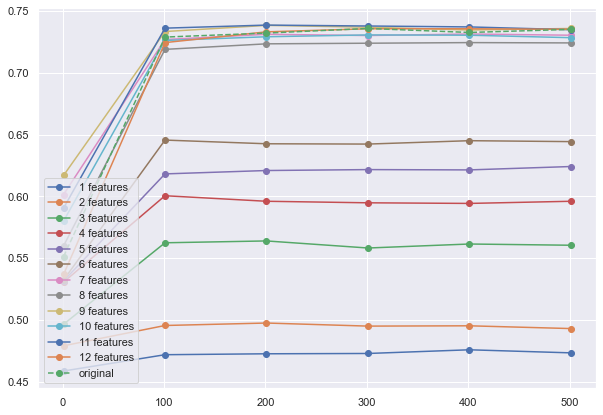

In [45]:
Score_clr = []
for m in range(1,502,100):    
    clr = RandomForestClassifier(criterion='entropy', n_estimators=m, random_state=100, n_jobs=8)
    clr.fit(x_train,y_train)
    Score_clr.append(clr.score(x_test,y_test))

plt.figure(figsize=(10,7))
for i in range(len(Score_clr_sc_total)):
    plt.plot(range(1,502,100),Score_clr_sc_total[i],"o-",label='{} features'.format((i+1)))
plt.plot(range(1,502,100),Score_clr,"o--",label='original')
plt.legend(loc='lower left')
plt.show()

## PCA Change
<font size='4'>In PCA case, the one that improve is KNN, both the decision tree and random forest get worst in performance.

Logistic Regression-PCA Change
--

for 1 components:  train: 0.24586666666666668  test: 0.22150323544051767
for 2 components:  train: 0.38634666666666667  test: 0.3827775012444002
for 3 components:  train: 0.5008  test: 0.5039820806371329
for 4 components:  train: 0.5499733333333333  test: 0.5373320059731209
for 5 components:  train: 0.5810133333333334  test: 0.5739173718267795
for 6 components:  train: 0.5890133333333334  test: 0.5808860129417621
for 7 components:  train: 0.5901866666666666  test: 0.5826281732205078
for 8 components:  train: 0.6148266666666666  test: 0.5968143354902937
for 9 components:  train: 0.61792  test: 0.5943255350920856
for 10 components:  train: 0.6222933333333334  test: 0.6017919362867098
for 11 components:  train: 0.6269866666666667  test: 0.6030363364858138
for 12 components:  train: 0.6269866666666667  test: 0.6030363364858138


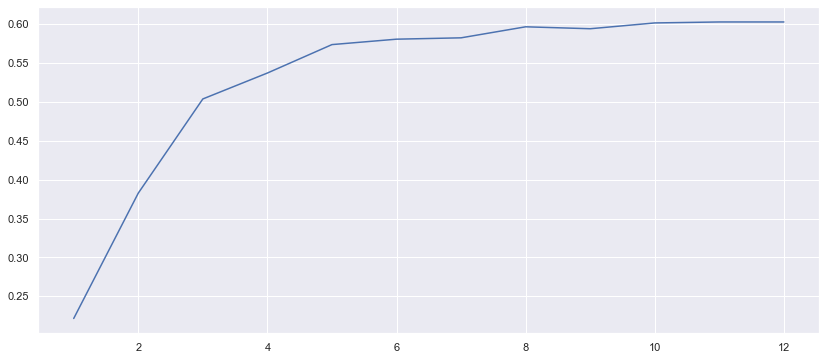

In [46]:
Score_lr_pc_total = []
for i in range(1,13,1):
    pcac = PCA(n_components=i)
    x_train_pc = pcac.fit_transform(x_train)
    x_test_pc = pcac.transform(x_test)
    lr_pc = LogisticRegression(solver='lbfgs',multi_class='auto')
    lr_pc.fit(x_train_pc,y_train)
    print('for {} components:'.format(i),end='  ')
    print('train:',lr_pc.score(x_train_pc,y_train),end='  ')
    print('test:',lr_pc.score(x_test_pc,y_test))
    Score_lr_pc_total.append(lr_pc.score(x_test_pc,y_test))
    
plt.plot(range(1,13,1),Score_lr_pc_total)
plt.show()

KNN-PCA Change
--

In [47]:
Score_clf_pc_total = []
for i in range(1,13,1):
    pcac = PCA(n_components=i)
    x_train_pc = pcac.fit_transform(x_train)
    x_test_pc = pcac.transform(x_test)
    print('for {} components:'.format(i))
    Score_clf_pc = []
    for m in range(10,51,10):
        clf_pc = KNeighborsClassifier(n_neighbors=m,p=2,weights='distance',algorithm='brute')
        clf_pc.fit(x_train_pc,y_train)
        print('for {} points:'.format(m),end='  ')
        print('train:',clf_pc.score(x_train_pc,y_train),end='  ')
        print('test',clf_pc.score(x_test_pc,y_test))
        Score_clf_pc.append(clf_pc.score(x_test_pc,y_test))
    Score_clf_pc_total.append(Score_clf_pc)

for 1 components:
for 10 points:  train: 0.9998933333333333  test 0.29915380786460927
for 20 points:  train: 0.9998933333333333  test 0.30238924838227976
for 30 points:  train: 0.9998933333333333  test 0.30288700846192135
for 40 points:  train: 0.9998933333333333  test 0.30288700846192135
for 50 points:  train: 0.9998933333333333  test 0.3048780487804878
for 2 components:
for 10 points:  train: 1.0  test 0.36112493777999005
for 20 points:  train: 1.0  test 0.3782976605276257
for 30 points:  train: 1.0  test 0.3837730214036834
for 40 points:  train: 1.0  test 0.38725734196117473
for 50 points:  train: 1.0  test 0.38800398208063713
for 3 components:
for 10 points:  train: 1.0  test 0.4634146341463415
for 20 points:  train: 1.0  test 0.4848183175709308
for 30 points:  train: 1.0  test 0.49402687904430065
for 40 points:  train: 1.0  test 0.5024888003982081
for 50 points:  train: 1.0  test 0.506470881035341
for 4 components:
for 10 points:  train: 1.0  test 0.5303633648581384
for 20 points:

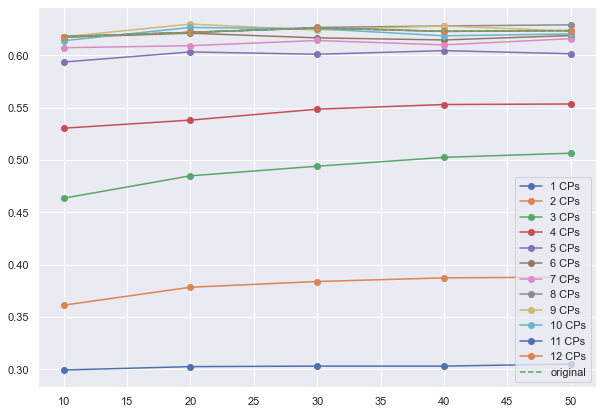

In [48]:
Score_clf = []
for m in range(10,51,10):#觀察鄰近點數量對模型影響
    clf = KNeighborsClassifier(n_neighbors=m,p=2,weights='distance',algorithm='brute')
    clf.fit(x_train,y_train)
    Score_clf.append(clf.score(x_test,y_test))
    
plt.figure(figsize=(10,7))
for i in range(len(Score_clf_pc_total)):
    plt.plot(range(10,51,10),Score_clf_pc_total[i],"o-",label='{} CPs'.format(i+1))
plt.plot(range(10,51,10),Score_clf,"--",label='original')
plt.legend(loc='best')
plt.show()

Decision Tree-PCA Change
--

In [49]:
Score_clt_pc_total = []
for i in range(1,13,1):
    pcac = PCA(n_components=i)
    x_train_pc = pcac.fit_transform(x_train)
    x_test_pc = pcac.transform(x_test)
    print('for {} components:'.format(i))
    Score_clt_pc = []
    for m in range(1,20):
        clt_pc = DecisionTreeClassifier(criterion='entropy',max_depth=m)
        clt_pc.fit(x_train_pc,y_train)
        print('for {} points:'.format(m),end='  ')
        print('train:',clt_pc.score(x_train_pc,y_train),end='  ')
        print('test',clt_pc.score(x_test_pc,y_test))
        Score_clt_pc.append(clt_pc.score(x_test_pc,y_test))
    Score_clt_pc_total.append(Score_clt_pc)

for 1 components:
for 1 points:  train: 0.29045333333333334  test 0.27899452463912394
for 2 points:  train: 0.3072  test 0.30761572921851665
for 3 points:  train: 0.3613866666666667  test 0.34519661523145845
for 4 points:  train: 0.3698133333333333  test 0.36037829766052765
for 5 points:  train: 0.37216  test 0.35390741662518665
for 6 points:  train: 0.38037333333333334  test 0.3511697361871578
for 7 points:  train: 0.3889066666666667  test 0.350920856147337
for 8 points:  train: 0.39754666666666666  test 0.350920856147337
for 9 points:  train: 0.40853333333333336  test 0.34942757590841217
for 10 points:  train: 0.42186666666666667  test 0.35365853658536583
for 11 points:  train: 0.43968  test 0.3446988551518168
for 12 points:  train: 0.45888  test 0.34196117471378795
for 13 points:  train: 0.47829333333333335  test 0.34121453459432555
for 14 points:  train: 0.5041066666666667  test 0.335490293678447
for 15 points:  train: 0.5252266666666666  test 0.33325037332005975
for 16 points:  tr

for 15 points:  train: 0.94496  test 0.5228969636635142
for 16 points:  train: 0.9665066666666666  test 0.5166749626679941
for 17 points:  train: 0.9790933333333334  test 0.5126928820308612
for 18 points:  train: 0.98816  test 0.5164260826281732
for 19 points:  train: 0.9936  test 0.512941762070682
for 8 components:
for 1 points:  train: 0.38453333333333334  test 0.374066699850672
for 2 points:  train: 0.43061333333333335  test 0.4123942259830762
for 3 points:  train: 0.4842666666666667  test 0.4659034345445495
for 4 points:  train: 0.5080533333333334  test 0.47486311597809855
for 5 points:  train: 0.5402666666666667  test 0.5087108013937283
for 6 points:  train: 0.5896533333333334  test 0.5447984071677452
for 7 points:  train: 0.6218666666666667  test 0.5599800895968143
for 8 points:  train: 0.65632  test 0.5637132901941264
for 9 points:  train: 0.69696  test 0.5786460925833748
for 10 points:  train: 0.74144  test 0.5806371329019413
for 11 points:  train: 0.7890133333333333  test 0.57

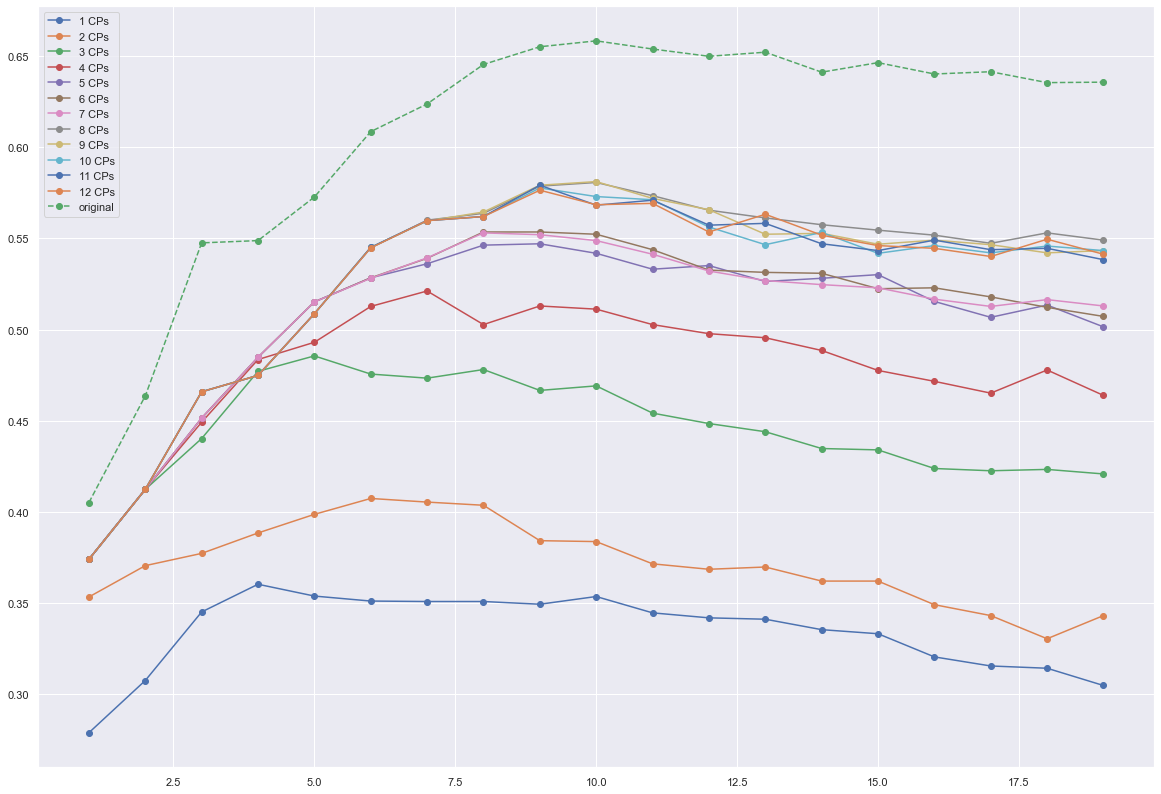

In [50]:
Score_clt = []
for m in range(1,20):
    clt = DecisionTreeClassifier(criterion='entropy',max_depth=m)
    clt.fit(x_train,y_train)
#     print('for {} max_dapth:'.format(m),end='  ')
#     print('train:',clt.score(x_train,y_train),end='  ')
#     print('test:',clt.score(x_test,y_test))
    Score_clt.append(clt.score(x_test,y_test))

plt.figure(figsize=(20,14))
for i in range(len(Score_clt_pc_total)):
    plt.plot(range(1,20),Score_clt_pc_total[i],"o-",label='{} CPs'.format(i+1))
plt.plot(range(1,20),Score_clt,"o--",label='original')
plt.legend(loc='best')
plt.show()

Random Forest-PCA Change
--

In [51]:
Score_clr_pc_total = []
for i in range(1,13,1):
    fspc = fs.SelectPercentile(fs.mutual_info_classif,percentile=i)
    x_train_pc = fspc.fit_transform(x_train,y_train)
    x_test_pc = fspc.transform(x_test)
    print('for {} components:'.format(i))
    Score_clr_pc = []
    for m in range(1,502,100):    
        clr_pc = RandomForestClassifier(criterion='entropy', n_estimators=m, random_state=100, n_jobs=8)
        clr_pc.fit(x_train_pc,y_train)
        print('for {} trees:'.format(m),end='  ')
        print('train:',clr_pc.score(x_train_pc,y_train),end='  ')
        print('test',clr_pc.score(x_test_pc,y_test))
        Score_clr_pc.append(clr_pc.score(x_test_pc,y_test))
    Score_clr_pc_total.append(Score_clr_pc)

for 1 components:
for 1 trees:  train: 0.49621333333333334  test 0.4586859133897461
for 101 trees:  train: 0.5088  test 0.4718765555002489
for 201 trees:  train: 0.5089066666666666  test 0.4726231956197113
for 301 trees:  train: 0.5089066666666666  test 0.4728720756595321
for 401 trees:  train: 0.5089066666666666  test 0.4758586361373818
for 501 trees:  train: 0.5089066666666666  test 0.47336983573917374
for 2 components:
for 1 trees:  train: 0.49621333333333334  test 0.4586859133897461
for 101 trees:  train: 0.5088  test 0.4718765555002489
for 201 trees:  train: 0.5089066666666666  test 0.4726231956197113
for 301 trees:  train: 0.5089066666666666  test 0.4728720756595321
for 401 trees:  train: 0.5089066666666666  test 0.4758586361373818
for 501 trees:  train: 0.5089066666666666  test 0.47336983573917374
for 3 components:
for 1 trees:  train: 0.49621333333333334  test 0.4586859133897461
for 101 trees:  train: 0.5088  test 0.4718765555002489
for 201 trees:  train: 0.5089066666666666  te

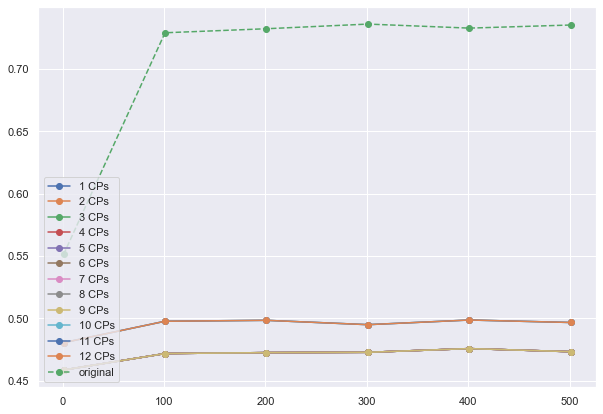

In [52]:
Score_clr = []
for m in range(1,502,100):    
    clr = RandomForestClassifier(criterion='entropy', n_estimators=m, random_state=100, n_jobs=8)
    clr.fit(x_train,y_train)
    Score_clr.append(clr.score(x_test,y_test))

plt.figure(figsize=(10,7))
for i in range(len(Score_clr_pc_total)):
    plt.plot(range(1,502,100),Score_clr_pc_total[i],"o-",label='{} CPs'.format(i+1))
plt.plot(range(1,502,100),Score_clr,"o--",label='original')
plt.legend(loc='lower left')
plt.show()